# Simple Hopfield Network (2 patterns)

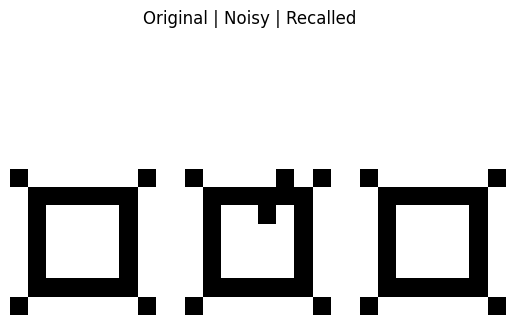

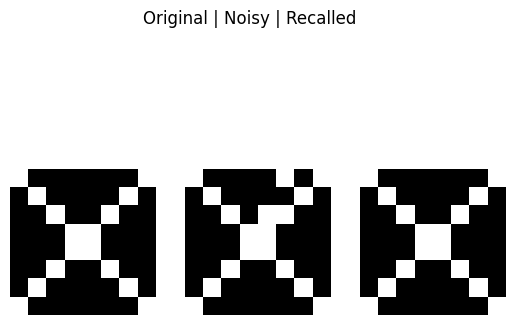

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.typing import NDArray

class HopfieldNetwork:
    def __init__(self, num_neurons: int):
        self.num_neurons = num_neurons
        self.weights = np.zeros((num_neurons, num_neurons), dtype=int)

    def train(self, patterns: list[NDArray[np.int64]]):
        for p in patterns:
            p = p * 2 - 1  # Convert {0,1} → {-1,1}
            self.weights += np.outer(p, p)
        np.fill_diagonal(self.weights, 0)

    def recall(self, pattern: NDArray[np.int64], steps: int=1000):
        s = pattern * 2 - 1
        for _ in range(steps):
            i = np.random.randint(0, self.num_neurons)
            net_input = np.dot(self.weights[i], s)
            s[i] = 1 if net_input >= 0 else -1
        return (s + 1) // 2  # Convert back to {0,1}
    
def plot_patterns(patterns: list[NDArray[np.int64]], title: str):
    _, axes = plt.subplots(1, len(patterns))
    for ax, pattern in zip(axes, patterns):
        ax.imshow(pattern.reshape(8, 8), cmap='gray')
        ax.axis('off')
    plt.suptitle(title)
    plt.show()

# Define 2 binary 8x8 patterns (e.g., digits "8" and "X")

pattern1: NDArray[np.int64] = np.array([
    [0,1,1,1,1,1,1,0],
    [1,0,0,0,0,0,0,1],
    [1,0,1,1,1,1,0,1],
    [1,0,1,1,1,1,0,1],
    [1,0,1,1,1,1,0,1],
    [1,0,1,1,1,1,0,1],
    [1,0,0,0,0,0,0,1],
    [0,1,1,1,1,1,1,0]
])

pattern2 = np.array([
    [1,0,0,0,0,0,0,1],
    [0,1,0,0,0,0,1,0],
    [0,0,1,0,0,1,0,0],
    [0,0,0,1,1,0,0,0],
    [0,0,0,1,1,0,0,0],
    [0,0,1,0,0,1,0,0],
    [0,1,0,0,0,0,1,0],
    [1,0,0,0,0,0,0,1],
])

# Flatten and train
flat1 = pattern1.flatten()
flat2 = pattern2.flatten()

# Train Hopfield network
network = HopfieldNetwork(num_neurons=64)
network.train([flat1, flat2])

def test(flat_pattern: NDArray[np.int64]):
    # Corrupt pattern1 slightly
    test_input = flat_pattern.copy()
    test_input[5] = 1 - test_input[5]
    test_input[20] = 1 - test_input[20]

    # Recall from the exact pattern
    recovered: NDArray[np.int64] = network.recall(test_input)

    plot_patterns([flat_pattern, test_input, recovered], title="Original | Noisy | Recalled")


test(flat1)
test(flat2)

In [2]:
print(network.weights)

[[ 0 -2 -2 ... -2 -2  2]
 [-2  0  2 ...  2  2 -2]
 [-2  2  0 ...  2  2 -2]
 ...
 [-2  2  2 ...  0  2 -2]
 [-2  2  2 ...  2  0 -2]
 [ 2 -2 -2 ... -2 -2  0]]


---

# Check if the weights is symmetric

In [3]:
from numpy.typing import NDArray

def is_symmetric(matrix: NDArray[np.int64]):
    """
    Check if a square matrix is symmetric.
    
    Args:
    matrix (numpy.ndarray): A 2D NumPy array representing the matrix.
    
    Returns:
    bool: True if the matrix is symmetric, False otherwise.
    """
    # Check if the matrix is square
    assert len(matrix.shape) == 2 and matrix.shape[0] == matrix.shape[1], "The input matrix must be square."
    
    # Compare the matrix with its transpose
    return np.allclose(matrix, matrix.T)

# Example usage
matrix = np.array([
    [1, 2, 3],
    [2, 4, 5],
    [3, 5, 6],
])
print(is_symmetric(matrix))  # True

matrix = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
])
print(is_symmetric(matrix))  # False

print(is_symmetric(network.weights)) # True

True
False
True


---

# References
- [ChatGPT Conversation](https://chatgpt.com/share/681ffb7c-3ccc-8010-9b41-d0ee06ea8e12)